# General Question.

Does the average trip time for citibike is affected by the gender of the person that made the trip?

# Specific Question

Using the 2017, July Citibike dataset. Is it possible to determine if the gender of a user significantly impacts the average of the triptime variable (in seconds)?

# Null Hypothesis:

The average triptime of a citibike trip during July 2017 is equal for male and female users.

# Alternative Hypothesis

The average triptime of a citibike trip during July 2017 is significantly (at a 95% confidence level) different depending on the user's gender.

In [20]:
import numpy as np
%matplotlib inline
import matplotlib as plt
import pandas as pd
import datetime as dt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [21]:
df = pd.read_csv("https://s3.amazonaws.com/tripdata/JC-201707-citibike-tripdata.csv.zip")

In [22]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,340,2017-07-01 00:00:08,2017-07-01 00:05:48,3186,Grove St PATH,40.719586,-74.043117,3267,Morris Canal,40.712419,-74.038526,29643,Subscriber,1994.0,2
1,439,2017-07-01 00:02:35,2017-07-01 00:09:55,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,29585,Subscriber,1980.0,1
2,186,2017-07-01 00:04:33,2017-07-01 00:07:40,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,29219,Subscriber,1984.0,1
3,442,2017-07-01 00:05:53,2017-07-01 00:13:15,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,29497,Subscriber,1969.0,1
4,170,2017-07-01 00:07:54,2017-07-01 00:10:45,3187,Warren St,40.721124,-74.038051,3186,Grove St PATH,40.719586,-74.043117,29483,Subscriber,1986.0,1


In [11]:
ndf = df [['tripduration', 'gender']]

In [12]:
ndf.head()

,tripduration,gender
0,340,2
1,439,1
2,186,1
3,442,1
4,170,1


In [13]:
ndf.gender = ndf.gender.replace(2, "Female")
ndf.gender = ndf.gender.replace(1, "Male")
ndf.gender = ndf.gender.replace(0, "Unknown")

In [15]:
ndf.head()


,tripduration,gender
0,340,Female
1,439,Male
2,186,Male
3,442,Male
4,170,Male


In [16]:
ndf.max()

tripduration     485426
gender          Unknown
dtype: object

In [17]:
df1 = ndf[ndf["tripduration"]<5000]
df2 = df1[df1["gender"]=="Male"]
df3 = df1[df1["gender"]=="Female"]
df4 = df1[df1["gender"]=="Unknown"]

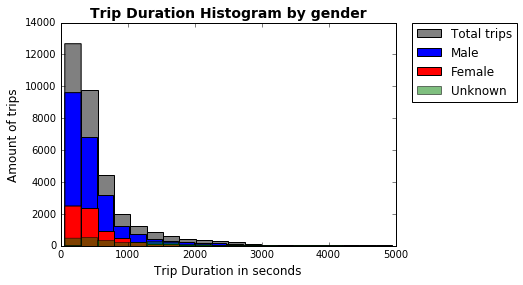

In [19]:
hist(df1.tripduration, bins = 20, color = "Grey", label = "Total trips")
hist(df2.tripduration, bins = 20, label = "Male")
hist(df3.tripduration, bins = 20, color="red", label = "Female")
hist(df4.tripduration, bins = 20, color="green", label = "Unknown", alpha=0.5)

plt.xlabel("Trip Duration in seconds", fontsize=12)
plt.ylabel("Amount of trips", fontsize=12)
plt.title("Trip Duration Histogram by gender", weight='bold', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [44]:
df2.describe()

,tripduration
count,23262.000000
mean,517.687645
std,492.309591
min,62.000000
25%,235.000000
50%,355.000000
75%,601.000000
max,4889.000000


In [45]:
df3.describe()

,tripduration
count,7108.000000
mean,562.456106
std,527.967253
min,61.000000
25%,263.000000
50%,391.000000
75%,645.250000
max,4947.000000


In [48]:
df4.describe()

,tripduration
count,2884.000000
mean,1112.196255
std,925.167480
min,61.000000
25%,394.000000
50%,865.500000
75%,1519.250000
max,4931.000000
